In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string

In [2]:
df=pd.read_csv("Corona_NLP (2).csv",encoding="latin_1")

In [3]:
df.head(15)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative


In [4]:
df.shape

(41157, 6)

In [5]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [6]:
df.isnull().sum().sum()

8590

In [7]:
df.isnull().mean()*100

UserName          0.000000
ScreenName        0.000000
Location         20.871298
TweetAt           0.000000
OriginalTweet     0.000000
Sentiment         0.000000
dtype: float64

# Dropping columns not needed in Sentiment analysis

In [8]:
df.head(2)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive


In [9]:
df=df[df.Sentiment !='Neutral']

In [10]:
# Dropping Username, ScreenName,Location,TweetAt
df.drop(['UserName','ScreenName','Location','TweetAt'],axis=1,inplace=True)

In [11]:
df.head()

,OriginalTweet,Sentiment
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,As news of the regionÂs first confirmed COVID...,Positive


In [12]:
df.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [13]:
type(df)

pandas.core.frame.DataFrame

# # Text preprocessing

In [14]:
df['OriginalTweet'].isnull().sum()

0

In [15]:
df['OriginalTweet'].str.lower()

1        advice talk to your neighbours family to excha...
2        coronavirus australia: woolworths to give elde...
3        my food stock is not the only one which is emp...
4        me, ready to go at supermarket during the #cov...
5        as news of the regionâs first confirmed covid...
                               ...                        
41150    i never that weâd be in a situation &amp; wor...
41151    @mrsilverscott you are definitely my man. i fe...
41153    response to complaint not provided citing covi...
41154    you know itâs getting tough when @kameronwild...
41156    @tartiicat well new/used rift s are going for ...
Name: OriginalTweet, Length: 33444, dtype: object

In [16]:
import neattext.functions as nfx
import re

In [17]:
# df.drop('clean_tweet',axis=1,inplace=True)

In [18]:
df.head()

,OriginalTweet,Sentiment
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,As news of the regionÂs first confirmed COVID...,Positive


In [19]:
df['clean_tweet']=df['OriginalTweet'].apply(lambda x: nfx.remove_userhandles(x))

In [20]:
df.head()

,OriginalTweet,Sentiment,clean_tweet
1,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV..."
5,As news of the regionÂs first confirmed COVID...,Positive,As news of the regionÂs first confirmed COVID...


In [21]:
df[['OriginalTweet','clean_tweet']].iloc[4]

OriginalTweet    As news of the regionÂs first confirmed COVID...
clean_tweet      As news of the regionÂs first confirmed COVID...
Name: 5, dtype: object

In [22]:
df['clean_tweet']=df['clean_tweet'].apply(lambda x: nfx.remove_hashtags(x))


In [23]:
df.head()

,OriginalTweet,Sentiment,clean_tweet
1,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the ou..."
5,As news of the regionÂs first confirmed COVID...,Positive,As news of the regionÂs first confirmed COVID...


In [24]:
df['clean_tweet']=df['clean_tweet'].apply(lambda x: nfx.remove_urls(x))

In [25]:
df.head()

,OriginalTweet,Sentiment,clean_tweet
1,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the ou..."
5,As news of the regionÂs first confirmed COVID...,Positive,As news of the regionÂs first confirmed COVID...


In [26]:
df[['OriginalTweet','clean_tweet']].iloc[0]

OriginalTweet    advice Talk to your neighbours family to excha...
clean_tweet      advice Talk to your neighbours family to excha...
Name: 1, dtype: object

In [27]:
df['clean_tweet']=df['clean_tweet'].apply(lambda x: nfx.remove_punctuations(x))

In [28]:
df.head()

,OriginalTweet,Sentiment,clean_tweet
1,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the out...
5,As news of the regionÂs first confirmed COVID...,Positive,As news of the regionÂs first confirmed COVID...


In [29]:
df['clean_tweet']=df['clean_tweet'].apply(lambda x: nfx.remove_stopwords(x))

In [30]:
df.head()

,OriginalTweet,Sentiment,clean_tweet
1,advice Talk to your neighbours family to excha...,Positive,advice Talk neighbours family exchange phone n...
2,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths elderly disa...
3,My food stock is not the only one which is emp...,Positive,food stock dont panic FOOD need Stay calm stay...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready supermarket outbreak Im paranoid food st...
5,As news of the regionÂs first confirmed COVID...,Positive,news regionÂs confirmed COVID19 case came Sul...


In [31]:
df['clean_tweet'].isnull().sum()

0

In [32]:
#Stopwords, Mentions, Urls, Hashtags and Punctuations removed

In [33]:
df['clean_tweet']=df['clean_tweet'] #.str.lower()

In [34]:
df.OriginalTweet.dtype

dtype('O')

In [35]:
df.head()

,OriginalTweet,Sentiment,clean_tweet
1,advice Talk to your neighbours family to excha...,Positive,advice Talk neighbours family exchange phone n...
2,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths elderly disa...
3,My food stock is not the only one which is emp...,Positive,food stock dont panic FOOD need Stay calm stay...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready supermarket outbreak Im paranoid food st...
5,As news of the regionÂs first confirmed COVID...,Positive,news regionÂs confirmed COVID19 case came Sul...


#  Tokenization

In [36]:
def tokenize(txt):
    tokens=re.split('\W+',txt)
    return tokens
df['c_t_tokenized']=df['clean_tweet'].apply(lambda x: tokenize(x.lower()))

In [37]:
df.head(5)

,OriginalTweet,Sentiment,clean_tweet,c_t_tokenized
1,advice Talk to your neighbours family to excha...,Positive,advice Talk neighbours family exchange phone n...,"[advice, talk, neighbours, family, exchange, p..."
2,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths elderly disa...,"[coronavirus, australia, woolworths, elderly, ..."
3,My food stock is not the only one which is emp...,Positive,food stock dont panic FOOD need Stay calm stay...,"[food, stock, dont, panic, food, need, stay, c..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready supermarket outbreak Im paranoid food st...,"[ready, supermarket, outbreak, im, paranoid, f..."
5,As news of the regionÂs first confirmed COVID...,Positive,news regionÂs confirmed COVID19 case came Sul...,"[news, regionâ, s, confirmed, covid19, case, c..."


In [38]:
df[['OriginalTweet','clean_tweet','c_t_tokenized']].iloc[2]

OriginalTweet    My food stock is not the only one which is emp...
clean_tweet      food stock dont panic FOOD need Stay calm stay...
c_t_tokenized    [food, stock, dont, panic, food, need, stay, c...
Name: 3, dtype: object

# Stemming

In [39]:
from nltk.stem import PorterStemmer

In [40]:
ps=PorterStemmer()

In [41]:
def stemming(token_txt):
    text=[ps.stem(w) for w in token_txt]
    return text

In [42]:
df['clean_stemmed']=df['c_t_tokenized'].apply(lambda x: stemming(x))

In [43]:
df.head()

,OriginalTweet,Sentiment,clean_tweet,c_t_tokenized,clean_stemmed
1,advice Talk to your neighbours family to excha...,Positive,advice Talk neighbours family exchange phone n...,"[advice, talk, neighbours, family, exchange, p...","[advic, talk, neighbour, famili, exchang, phon..."
2,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths elderly disa...,"[coronavirus, australia, woolworths, elderly, ...","[coronaviru, australia, woolworth, elderli, di..."
3,My food stock is not the only one which is emp...,Positive,food stock dont panic FOOD need Stay calm stay...,"[food, stock, dont, panic, food, need, stay, c...","[food, stock, dont, panic, food, need, stay, c..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready supermarket outbreak Im paranoid food st...,"[ready, supermarket, outbreak, im, paranoid, f...","[readi, supermarket, outbreak, im, paranoid, f..."
5,As news of the regionÂs first confirmed COVID...,Positive,news regionÂs confirmed COVID19 case came Sul...,"[news, regionâ, s, confirmed, covid19, case, c...","[news, regionâ, s, confirm, covid19, case, cam..."


# #Stemming is prone to errors and words processed don't give much of meaning. Therefore we go for lemmatization


# Lemmatization 

In [44]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
wn = nltk.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\muqee\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\muqee\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [45]:
def lemma(token_txt):
    text=[wn.lemmatize(w) for w in token_txt]
    return text

In [46]:
df['clean_lemmatized']=df['c_t_tokenized'].apply(lambda x: lemma(x))

In [47]:
df.head()

,OriginalTweet,Sentiment,clean_tweet,c_t_tokenized,clean_stemmed,clean_lemmatized
1,advice Talk to your neighbours family to excha...,Positive,advice Talk neighbours family exchange phone n...,"[advice, talk, neighbours, family, exchange, p...","[advic, talk, neighbour, famili, exchang, phon...","[advice, talk, neighbour, family, exchange, ph..."
2,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths elderly disa...,"[coronavirus, australia, woolworths, elderly, ...","[coronaviru, australia, woolworth, elderli, di...","[coronavirus, australia, woolworth, elderly, d..."
3,My food stock is not the only one which is emp...,Positive,food stock dont panic FOOD need Stay calm stay...,"[food, stock, dont, panic, food, need, stay, c...","[food, stock, dont, panic, food, need, stay, c...","[food, stock, dont, panic, food, need, stay, c..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready supermarket outbreak Im paranoid food st...,"[ready, supermarket, outbreak, im, paranoid, f...","[readi, supermarket, outbreak, im, paranoid, f...","[ready, supermarket, outbreak, im, paranoid, f..."
5,As news of the regionÂs first confirmed COVID...,Positive,news regionÂs confirmed COVID19 case came Sul...,"[news, regionâ, s, confirmed, covid19, case, c...","[news, regionâ, s, confirm, covid19, case, cam...","[news, regionâ, s, confirmed, covid19, case, c..."


# Replacing "Extremely" from the target variables 


In [48]:
df['Sentiment']

1                  Positive
2                  Positive
3                  Positive
4        Extremely Negative
5                  Positive
                ...        
41150              Positive
41151    Extremely Positive
41153    Extremely Negative
41154              Positive
41156              Negative
Name: Sentiment, Length: 33444, dtype: object

In [49]:
df['Sentiment'].replace(['Extremely Positive','Extremely Negative'],['Positive','Negative'], inplace=True)

In [50]:
df['Sentiment']

1        Positive
2        Positive
3        Positive
4        Negative
5        Positive
           ...   
41150    Positive
41151    Positive
41153    Negative
41154    Positive
41156    Negative
Name: Sentiment, Length: 33444, dtype: object

In [51]:
df.head()

,OriginalTweet,Sentiment,clean_tweet,c_t_tokenized,clean_stemmed,clean_lemmatized
1,advice Talk to your neighbours family to excha...,Positive,advice Talk neighbours family exchange phone n...,"[advice, talk, neighbours, family, exchange, p...","[advic, talk, neighbour, famili, exchang, phon...","[advice, talk, neighbour, family, exchange, ph..."
2,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths elderly disa...,"[coronavirus, australia, woolworths, elderly, ...","[coronaviru, australia, woolworth, elderli, di...","[coronavirus, australia, woolworth, elderly, d..."
3,My food stock is not the only one which is emp...,Positive,food stock dont panic FOOD need Stay calm stay...,"[food, stock, dont, panic, food, need, stay, c...","[food, stock, dont, panic, food, need, stay, c...","[food, stock, dont, panic, food, need, stay, c..."
4,"Me, ready to go at supermarket during the #COV...",Negative,ready supermarket outbreak Im paranoid food st...,"[ready, supermarket, outbreak, im, paranoid, f...","[readi, supermarket, outbreak, im, paranoid, f...","[ready, supermarket, outbreak, im, paranoid, f..."
5,As news of the regionÂs first confirmed COVID...,Positive,news regionÂs confirmed COVID19 case came Sul...,"[news, regionâ, s, confirmed, covid19, case, c...","[news, regionâ, s, confirm, covid19, case, cam...","[news, regionâ, s, confirmed, covid19, case, c..."


In [52]:
df["clean_lemmatized"].str.len() != 0 #Therefore no string is empty

1        True
2        True
3        True
4        True
5        True
         ... 
41150    True
41151    True
41153    True
41154    True
41156    True
Name: clean_lemmatized, Length: 33444, dtype: bool

#  CLEANING FUNCTION 

In [53]:
def clean(txt):
    txt="".join([c for c in txt if c not in string.punctuation])
    tokens= re.split('\W+',txt)
    txt= [ps.stem(word) for word in tokens if word not in stopwords]
#     df['clean_tweet']=df['clean_tweet'].apply(lambda x: nfx.remove_urls(x))
    return txt

# TF-IDF Vectorization

In [54]:
import nltk
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')
ps= nltk.PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\muqee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
tfidf= TfidfVectorizer(analyzer=clean)

In [57]:
x = tfidf.fit_transform(df['clean_tweet'])
print(x.shape)

(33444, 27785)


In [58]:
df1= pd.DataFrame(x.toarray(), columns=tfidf.get_feature_names())

c:\users\muqee\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [59]:
df1

,,0,00,000,0000009375,000042,0000hr,0006,000franc,001,...,zwd,zweli,zwoferink,zzz,zâ,zã¼rich,â,â²,ã,ã¼berweist
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
33440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.169634,0.0,0.0,0.0
33441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
33442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [60]:
y=pd.get_dummies(df['Sentiment'])

In [61]:
y


,Negative,Positive
1,0,1
2,0,1
3,0,1
4,1,0
5,0,1
...,...,...
41150,0,1
41151,0,1
41153,1,0
41154,0,1


In [62]:
y=y.iloc[:,0].values

In [63]:
y

array([0, 0, 0, ..., 1, 0, 1], dtype=uint8)

# Train test split

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0) 

# Naive Bayes Classification with Confusion Matrix

In [66]:
from sklearn.naive_bayes import MultinomialNB

In [67]:
MNB=MultinomialNB()

In [68]:
sentiment_analysis_model = MNB.fit(X_train,y_train)

In [69]:
y_pred = sentiment_analysis_model.predict(X_test)

In [70]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
NBC_CM=confusion_matrix(y_test,y_pred)

In [73]:
NBC_CM

array([[3253,  374],
       [1017, 2045]], dtype=int64)

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
NBC_acc=accuracy_score(y_test,y_pred)

In [76]:
NBC_acc

0.7920466437434595

# SVM Classification with Confusion Matrix

In [77]:
from sklearn.svm import SVC

In [78]:
svm=SVC()

In [79]:
svm.fit(X_train,y_train)

SVC()

In [80]:
svm_pred = svm.predict(X_test)

In [81]:
svm_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=uint8)

In [82]:
SVM_CM=confusion_matrix(y_test,svm_pred)

In [83]:
SVM_CM

array([[3251,  376],
       [ 514, 2548]], dtype=int64)

In [84]:
SVM_acc=accuracy_score(y_test,svm_pred)

In [85]:
SVM_acc

0.8669457317984751

# KNN Classificationn with Confusion matrix

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
knn=KNeighborsClassifier()

In [88]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [89]:
knn_pred=knn.predict(X_test)

In [90]:
knn_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=uint8)

In [91]:
KNN_CM=confusion_matrix(y_test,knn_pred)

In [92]:
KNN_CM

array([[2756,  871],
       [1069, 1993]], dtype=int64)

In [93]:
KNN_acc=accuracy_score(y_test,knn_pred)

In [94]:
KNN_acc

0.7099715951562267

In [95]:
import matplotlib.pyplot as plt

<BarContainer object of 3 artists>

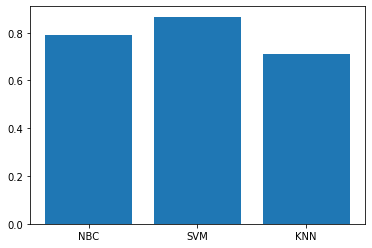

In [96]:
plt.bar(x=['NBC','SVM','KNN'],height=[NBC_acc,SVM_acc,KNN_acc])

# Therefore SVM model has the highest accuracy score for this dataset.